<img src="http://jasonswoods.com/wp-content/uploads/2017/08/zombie-apocalypse.jpg" style="float: center; margin: 50px; height: 300px">


## A Double Blind Study - Zombie-Potion Efficacy Study
    Does the potion increase patient's cravings for brains???


---

### Objectives
- Define the null and alternative hypotheses.
- Perform a two-sample t-test.
- Define the t-statistics and p-value.
- List the steps of hypothesis testing.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Hypothesis Testing

- We randomly select 1000 people to be in the placebo control condition and 1000 people to recieve the zombie potion.
- We know our sample is selected from a broader, unknown population pool - tens of thousands have been captured for experimentation in the hopes of creating a **zombie army**.

<img src="https://media.giphy.com/media/6q6iJkAi15mBa/giphy.gif" style="float: center; margin: 10px; height: 300px">

### What are the 5 steps in Hypothesis Testing??
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your point estimate(s).  (aka what is our statistic?)
4. Calculate your test statistic.
5. Find your $p$-value and make a conclusion.

### 1. We need to define our hypotheses... We want to see if there is a difference between the control group and the treatment group. What is our Null hypothesis and what is our Alternative hypothesis?

**H0 ("H-Naught"):** The mean difference between treatment and control groups is zero. Humans remain humans.

<img src="https://cdn.psychologytoday.com/sites/default/files/field_blog_entry_images/2018-05/o-hug-facebook.jpg" style="float: center; margin: 15px; height: 200px">

**HA:** The mean difference between treatment and control groups is different.

<img src="https://www.basementmedicine.org/wp-content/uploads/2013/09/human-vs-zombies.jpg" style="float: center; margin: 15px; height: 250px">

## The T-Test

---

#### Brain Cravings: After their first week of treatment, subjects are asked to rate their craving for brains on a scale of 1-100. We receive the following results: 


**(Let's set up the treatment and control observations below as numpy arrays.)**

In [4]:
np.random.seed()

control_group = 

In [5]:
treatment_group= 

In [6]:
print("The difference between the means of our two groups is:", 


The difference between treatment and control groups appears large, but, with 1000 subjects in each group, how confident can we be that this measured difference is real? 

**Let's perform a t-test to find out!**
The t-test can tell us if the differences between the two groups is signficant.

First, we will calculate a **t-statistic**. The t-statistic is a measure of the degree to which our groups differ, standardized by the variance of our measurements.

Secondly, we will calculate a **p-value**. The p-value is a metric that indicates a probability that our measured difference was because of random chance in the sampling of subjects.

### Step 2: Specify a level of significance

If $P(\text{data}\;|\;H_0)$ is "small" then our data probably does not support our null hypothesis.  But how "small" is small enough?

This is set by our level of significance, which we call $\alpha$.  (alpha)

Typically (and somewhat arbitrarily) the value $\alpha=0.05$ is used.  This means that there is a 5% chance that we will _incorrectly reject the null hypothesis_ (aka Type 1 error or false positive).  Put another way, there is a 5% chance that we will claim a significant difference between the two groups when in fact there is no (statistically significant) difference.
It's also not uncommon to use a 0.01, so let's try that for today...

In [7]:
alpha = 0.01

<a id='t-statistic'></a>

### Calculating the T-Statistic

---

When comparing two means, the **t-statistic** is a classic metric for quantifying the difference between groups. Our t-statistic tells us the difference between groups where the standardization is adjusting for the variance in measurements.

When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

### $$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 (\frac{1}{n_E} + \frac{1}{n_C})}}$$


**Let's do this calculation using `scipy.stats.ttest_ind`.**

In [8]:
import scipy.stats as stats

In [9]:
t_stat, p_value = 


#### Now we can compare our p_value to our alpha to determine if there is a signficant difference between groups.

Recall that our alpha is 0.01. We can see above that our p_value is less that our alpha value (it's essentially zero). What does this tell us?

<a id='visualizing-t-statistic'></a>

### Visualizing the T-Statistic

We can plot the t-distribution below. It is centered on 0, where a value of 0 corresponds to our null hypothesis. We can also plot a vertical line with our measured t-statistic.

In [12]:
# Generate points on the x axis between -45 and 45:
xpoints = np.linspace(-45, 45, 30)  #(min, max, how many steps in between)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (100 + 100 -2), 0, 1)     
#probability density function, then the points we want to pass in, the mean and the std, and ddof

In [13]:
# # Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))

# # Get the current "axis" out of the figure.
ax = fig.gca()

# # Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# # Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

# #the vertical line is the t-statistic 

<a id='p-value'></a>

### Step 5: The P-Value: Now we can calculate the statisitical signficance of the test with a pvalue

With the t-statistic, we are able to calculate the *statistical significance* of the test with a **p-value**. Statistical significance indicates our degree of confidence to infer a parameter about an overall population based on a statistic calculated from our sample.

> **The p-value is the probability that, given that the null hypothesis `H0` is true, we could have ended up with a statistic at least as extreme as the one measured from our random sample of data from the true population.**

We have measured a difference in brain cravings of +42.33999 between the serum and control groups. We then calculated a t-statistic associated with this difference of +14.135. In our specific example:

> The p-value is the probability that, given there is a 0.0 true difference in brain cravings between zombie-serum and control conditions (i.e., no effect of the zombie-zerum), we were able to calculate a t-statistic at least as extreme as +14.135 from a random sample of data from the true population.

<a id='visualize-p-value'></a>

### Visualizing the P-Value

---

Our null hypothesis states that there is no difference between the groups, so the t-statistic would be 0. 

Recall that our alternative hypothesis is that the difference between groups is *not* 0. This could mean that the difference is greater *or* less than 0 — we haven't specified either. This is known as a **two-tailed t-test**, which is what we are currently conducting. The test is "two tailed" because, when we say "at least as extreme as ...," we are thinking about the *magnitude* of our t-statistic.

**We can plot the t-distribution again using our positive and negative t-statistic**

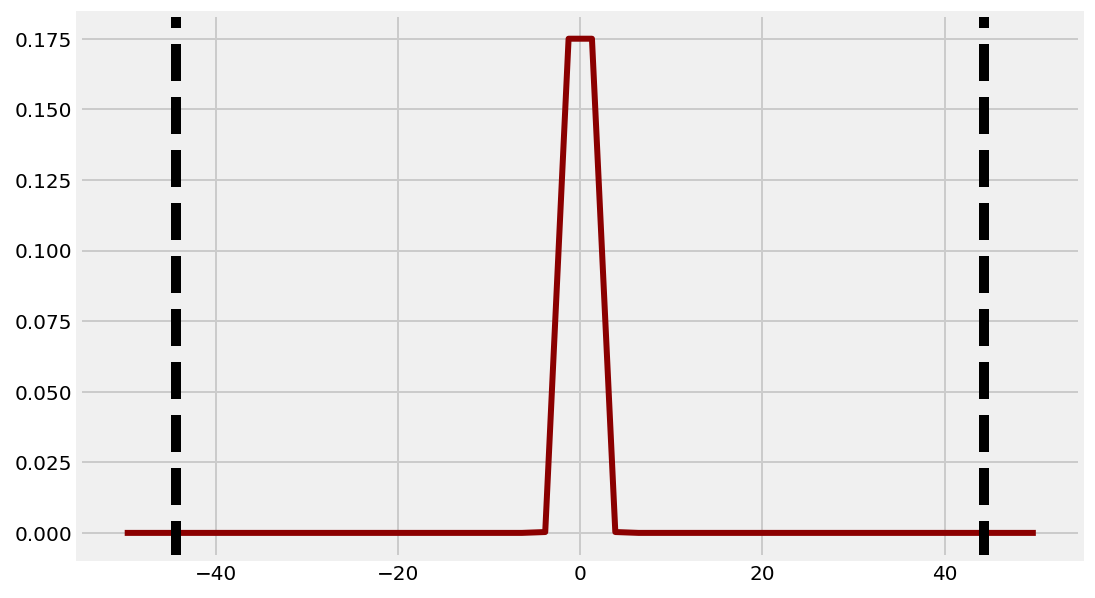

In [100]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

**Our p-value corresponds to the area under the curve of the distribution where the magnitude of the t-statistic is greater than or equal to the one we measured (shown with the dotted lines)**.

`stats.t.cdf()` is the cumulative distribution function and will calculate the area under the curve, up to a specified t-statistic. 

**Calculate the area under the tails of the t-distribution that falls beyond the dotted lines using the `.cdf()` function. This will verify that it's the same as the p-value calculated by `scipy`.**

In [14]:
# #sample sizes
n_zombie = len(treatment_group)
n_control = len(control_group)

# # calculate area in the tails using cdf
lower_tail = stats.t.cdf(t_stat, (n_zombie + n_control - 2))    #whats the value of the tstat and how many degrees of freedom
upper_tail = 1 - stats.t.cdf(abs(t_stat), (n_zombie + n_control -2))            

# #calculate p-value
p_value_manual = lower_tail + upper_tail

# #print out tails and pvalues

### So what's the conclusion? *(this will show up in interviews!)*

Remember that $\alpha$ is our level of significance.  Let's call the $p$-value $p$.

- If $p < \alpha$, then there is evidence to reject the null hypothesis, so you conclude that $H_0$ is incorrect and therefore $H_1$ is correct.
    - i.e., a statisically significant difference between the two groups!
- If $p > \alpha$, then there is insufficient evidence to reject the null hypothesis and you cannot conclude that either $H_0$ or $H_1$ is correct or incorrect.
    - i.e., there is no statistical difference between your two groups.

### Since our p-value is less than our alpha (0.01) we can say that there is ample evidence to reject the null hypothesis. We can conclude that the null hypothesis is false and our alternative hypothesis is correct... the potion is effective and we have a zombie army in the making!!!!!

<img src="https://media.giphy.com/media/Z4IXspU3iCHlK/giphy.gif" style="float: center; margin: 40px; height: 400px">

<a id='additional-resources'></a>

### Additional Resources

---

- [A high-level overview of the t-test procedure](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics).
- [Another overview of the t-test procedure](http://www.statsdirect.com/help/parametric_methods/utt.htm).
